# Regresión lineal: Ejemplo de tasación de viviendas
M2U2 - Ejercicio 7

## ¿Qué vamos a hacer?
- Entrenar un modelo de regresión lineal multivariable
- Crear un dataset sintético siguiendo un esquema de datos real

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

## Set de datos de tasación de viviendas sintético

En esta ocasión vamos a explorar cómo crear un dataset sintético que siga la estructura que queramos, para simular un dataset real con plena flexibilidad.

En este caso, vamos a usar como ejemplo un dataset inmobiliario con el objetivo de entrenar un tadador de viviendas con las siguientes características:

Variable objetivo o dependiente:
- Precio de venta (int)

Características, variables explicatorias o independientes:
- Superficie útil (int)
- Localización (int, representando la barriada como categoría ordinal)
- Tipo de vivienda (int, representando piso, chalet, adosado, ático, etc. como categoría ordinal)
- Nº de habitaciones (int)
- Nº de cuartos de baño (int)
- Garaje (int, 0/1 representando si tiene o no)
- Superficie zonas comunes (int)
- Año de construcción (int)

Nuestro modelo intentará aproximar una función lineal multivariable que nos permita interpretar el mercado inmobiliario y hacer predicciones sobre el precio de venta de nuevas viviendas, según la función lineal:

$$Y = h_\Theta(x) = X \times \Theta^T$$
Donde $h_\Theta(x)$ es la hipótesis lineal.

### Creación del dataset sintético

Primero crearemos un ejemplo de una vivienda con datos conocidos, con los valores de sus características y el precio de venta:

In [2]:
x_ej1 = np.asarray([100, 4, 2, 2, 1, 0, 30, 10])
y_ej1 = np.asarray([80000])

print('Precio de venta de la vivienda:', y_ej1[0])
print('Superficie útil:', x_ej1[0])
print('Localización:', x_ej1[1])
print('Tipo de vivienda:', x_ej1[2])
print('Nº de habitaciones:', x_ej1[3])
print('Nº de cuartos de baño:', x_ej1[4])
print('Garaje (sí/no):', x_ej1[5])
print('Superficie de zonas comunes:', x_ej1[6])
print('Antigüedad:', x_ej1[7])

Precio de venta de la vivienda: 80000
Superficie útil: 100
Localización: 4
Tipo de vivienda: 2
Nº de habitaciones: 2
Nº de cuartos de baño: 1
Garaje (sí/no): 0
Superficie de zonas comunes: 30
Antigüedad: 10


De esta forma podemos crear nuevos ejemplos con los valores que queramos a nuestro antojo.

Modifica los valores de la vivienda anterior para generar otras viviendas de forma manual.

Del mismo modo que hemos creado un ejemplo de vivienda manualmente, vamos a crear múltiples ejemplos aleatorios de forma automática:

*Nota*: Por simpleza a la hora de generar nºs aleatorios con código, vamos a usar float en lugar de int en los mismos rangos lógicos para las características de las viviendas.

In [3]:
m = 100           # nº de ejemplos de viviendas
n = x_ej1.shape[0]    # nº de características de cada vivienda

X = np.random.rand(m, n)

print('Primeros 10 ejemplos de X:')
print(X[:10, :])
print('Tamaño de la matriz de ejemplos X:')
print(X.shape)

Primeros 10 ejemplos de X:
[[0.73606413 0.60732159 0.99203717 0.9118979  0.22600024 0.82640137
  0.56566639 0.74476843]
 [0.09160572 0.47301045 0.57202656 0.92478079 0.68349437 0.98568605
  0.17250515 0.8522065 ]
 [0.78965573 0.73069512 0.3761072  0.88345767 0.56563983 0.52394704
  0.71358958 0.8839697 ]
 [0.91830535 0.91807925 0.26706679 0.9525051  0.12909037 0.49265693
  0.22363844 0.35306873]
 [0.59054028 0.95378177 0.16041692 0.82842301 0.35287977 0.37035925
  0.5112291  0.93943668]
 [0.74803728 0.99270688 0.19065143 0.80794265 0.32684115 0.7285995
  0.66065739 0.70029576]
 [0.61836926 0.24993325 0.01057531 0.6420299  0.7855036  0.47056992
  0.83247301 0.32910396]
 [0.11991434 0.34900469 0.29947489 0.99882565 0.56551182 0.6424324
  0.52654887 0.74572256]
 [0.03546618 0.64555015 0.45575873 0.64533707 0.39640169 0.12438264
  0.81865502 0.51247597]
 [0.55795546 0.21225918 0.92425855 0.19498899 0.59898694 0.55649278
  0.01280964 0.74779405]]
Tamaño de la matriz de ejemplos X:
(100, 8)


*¿Cómo podemos crear el vector *Y* de precios de venta de nuestro dataset sintético, de forma que sigua la relación lineal que queremos aproximar?*

Para ello, debemos partir de una *Theta_verd* como en ejercicios pasados.

A veces, el problema es obtener una *Y* en el rango que quisiéramos modificando cada valor de *Theta_verd*, lo que puede ser bastante tedioso.

En otros casos, una alternativa sería crear *X* e *Y* manualmente, y luego calcular la *Theta_verd* correspondinete a dichas matrices.

En este caso, crearemos *Theta_verd* a mano para poder interpretar sus valores:

In [4]:
x = X[0, :]

print('Ej. de vivienda con características aleatorias:')
print(x)

Theta_verd = np.asarray([1000., -500, 10000, 5000, 2500, 6000, 50, -1500])

print('\nEj. de pesos de características creados manualmente:')
print(Theta_verd)
print(Theta_verd.shape)

print('\nEl precio de venta de dicha vivienda viene dado por sus características:')
print('Por cada m2 de superficie útil:', Theta_verd[0])
print('Por cada km de distancia al centro:', Theta_verd[1])
print('Según el tipo de vivienda:', Theta_verd[2])
print('Según el nº de habitaciones:', Theta_verd[3])
print('Según el nº de cuartos de baño:', Theta_verd[4])
print('Según si tiene garaje:', Theta_verd[5])
print('Por cada m2 de superficie de zonas comunes:', Theta_verd[6])
print('Por cada año de antigüedad:', Theta_verd[7])

Ej. de vivienda con características aleatorias:
[0.73606413 0.60732159 0.99203717 0.9118979  0.22600024 0.82640137
 0.56566639 0.74476843]

Ej. de pesos de características creados manualmente:
[ 1000.  -500. 10000.  5000.  2500.  6000.    50. -1500.]
(8,)

El precio de venta de dicha vivienda viene dado por sus características:
Por cada m2 de superficie útil: 1000.0
Por cada km de distancia al centro: -500.0
Según el tipo de vivienda: 10000.0
Según el nº de habitaciones: 5000.0
Según el nº de cuartos de baño: 2500.0
Según si tiene garaje: 6000.0
Por cada m2 de superficie de zonas comunes: 50.0
Por cada año de antigüedad: -1500.0


Cada uno de estos pesos multiplicará su característica correspondiente, sumando o restando al precio total de la vivienda.

Sin embargo, a nuestro set de datos sintético ideal le falta un término muy importante, el _bias_ o _intercept_:
El _bias_ es el término _b_ de cualquier recta $y = m * x + b$, el que respresenta la suma de todas las constantes que afectan a nuestro modelo o el precio base, antes de verse modificado por el resto de características.

Este _bias_ es muy importante porque un modelo no sólo debe poder aproximar pesos o coeficientes que multipliquen a las características dadas, sino también a valores constantes que no dependan de las características concretas de cada ejemplo.

O lo que es lo mismo: _precio = coeficientes * características + "bias o precio base"_.

P. ej., en el caso de viviendas, sería el precio de partida de todas las viviendas, si lo hubiera, independientemente de sus características, las cuales suman o restan a partir del mismo. En el caso de un estudio sin habitaciones independientes, WC compartido, sin garaje, etc., etc., donde todas sus características fueran 0, nos permitiría determinar su precio de venta, *que no sería de 0 € seguramente*.

Añadimos a *Theta_verd* un _bias_ o precio de partida.

In [5]:
# CUIDADO: Cada vez que ejecutamos esta celda estamos añadiendo una columna
# de 1s a Theta_verd y X, por lo que sólo debemos ejecutarla una vez

Theta_verd = np.insert(Theta_verd, 0, 25000)    # 25000 € de precio de partida = theta[0]
X = np.insert(X, 0, np.ones(m), axis=1)

print('Theta verdadero y 10 primeros ejemplos (filas) de X:')
print(Theta_verd)
print(X[:10, :])
print('Tamaños de X y Tetha verdadero:')
print(X.shape)
print(Theta_verd.shape)

Theta verdadero y 10 primeros ejemplos (filas) de X:
[25000.  1000.  -500. 10000.  5000.  2500.  6000.    50. -1500.]
[[1.         0.73606413 0.60732159 0.99203717 0.9118979  0.22600024
  0.82640137 0.56566639 0.74476843]
 [1.         0.09160572 0.47301045 0.57202656 0.92478079 0.68349437
  0.98568605 0.17250515 0.8522065 ]
 [1.         0.78965573 0.73069512 0.3761072  0.88345767 0.56563983
  0.52394704 0.71358958 0.8839697 ]
 [1.         0.91830535 0.91807925 0.26706679 0.9525051  0.12909037
  0.49265693 0.22363844 0.35306873]
 [1.         0.59054028 0.95378177 0.16041692 0.82842301 0.35287977
  0.37035925 0.5112291  0.93943668]
 [1.         0.74803728 0.99270688 0.19065143 0.80794265 0.32684115
  0.7285995  0.66065739 0.70029576]
 [1.         0.61836926 0.24993325 0.01057531 0.6420299  0.7855036
  0.47056992 0.83247301 0.32910396]
 [1.         0.11991434 0.34900469 0.29947489 0.99882565 0.56551182
  0.6424324  0.52654887 0.74572256]
 [1.         0.03546618 0.64555015 0.45575873 0.645

Contando con dicho *Theta_verd*, podemos establecer el vector *Y* de precios de venta de nuestros ejemplos:

In [6]:
# TODO: Modifica el siguiente código para añadir un término de error aleatorio a Y
Y = np.matmul(X, Theta_verd)

error = 0.15

termino_error = np.random.uniform(-error, error, size=Y.shape)

Y = Y * (1 + termino_error)


print('Precios de venta:')
print(Y)
print(Y.shape)



Precios de venta:
[39268.48223079 45887.51904987 38018.79363504 35804.69901338
 30626.88054471 33594.09773327 29855.60234617 42362.62472167
 29757.63153921 45183.02078681 37658.8705585  44855.97454899
 32710.63684359 38146.0510852  40941.70266954 35682.3408741
 42737.52483131 42162.02181765 33239.68782597 25137.32933283
 42733.88661889 29594.42174601 38707.99777796 39228.26262343
 37495.13886326 39648.12952984 36055.73927453 30429.98412081
 37383.63526449 31881.19744366 33659.77377702 40588.06612651
 50194.64678089 46363.50414894 44804.54141566 29798.24698161
 31522.44562966 34716.69800576 39080.5199569  30791.83050418
 34188.31328367 39138.98958287 31269.79947273 29506.14486572
 40114.01234085 34461.37873449 39722.09415545 35917.06791484
 36614.71451155 33158.85491506 36697.25873919 37744.25429279
 30248.17508056 41494.7308117  27452.33880489 40824.64130046
 35927.50695939 45614.94864049 33829.55819962 34794.43292376
 35821.35974009 37036.73753703 26666.45789813 34048.72172405
 35241.

*Nota*: Al no haber usado valores int finalmente, los precios de venta son también valores float.

## Entrenamiento del modelo

Una vez listo nuestro dataset de datos de entrenamiento, vamos a entrenar el modelo de regresión lineal.

Para ello, copia las celdas correspondientes de los últimos ejercicios para entrenar el modelo con estos datos y evalúa su comportamiento:

In [7]:
# TODO: Copia las celdas correspondientes para entrenar un modelo por regresión lineal y evaluar su entrenamiento

import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     22.64
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           1.23e-18
Time:                        16:44:55   Log-Likelihood:                -949.07
No. Observations:                 100   AIC:                             1916.
Df Residuals:                      91   BIC:                             1940.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.179e+04   1763.017     12.357      0.0

## Predicciones

Por tanto, si creamos un nuevo ejemplo de vivienda manualmente con características aleatorias, podemos hacer una predicción sobre su precio de venta:

In [8]:
# TODO: Crea una nueva vivienda con características aleatorias y calcula su Y predicha
# Recuerda añadirle a X un término de bias de 1.
n = X.shape[1] - 1

x_pred = np.random.rand(n)

# Añadimos el término de bias
x_pred = np.insert(x_pred, 0, 1)

y_pred = np.matmul(x_pred, Theta_verd)    # Usa la theta entrenada por tu modelo en el paso anterior

print('Ej. de vivienda aleatorio:')
print(x_pred)

print('Precio predicho para dicha vivienda:')
print(y_pred)

Ej. de vivienda aleatorio:
[1.         0.22411857 0.86621523 0.61252498 0.95991963 0.10553744
 0.20485955 0.87067442 0.28731646]
Precio predicho para dicha vivienda:
36821.418820023755


¿Y nuestro dataset sintético original? ¿Qué precio de venta tendría? ¿Y qué resíduos tendría nuestro modelo sobre ellos?

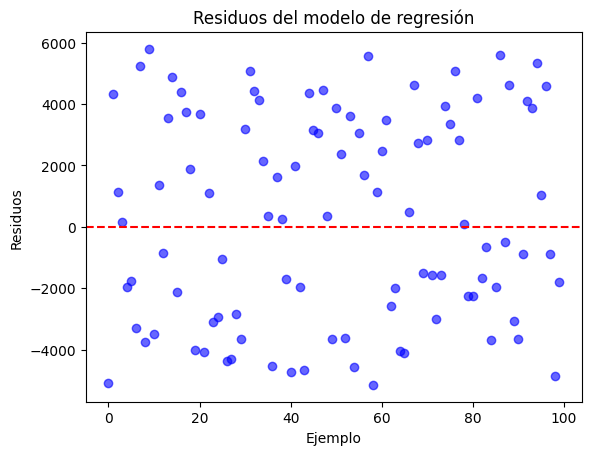

In [9]:
# TODO: Calcula y representa gráficamente los resíduos del modelo

Y_pred = np.matmul(X, Theta_verd)


residuos = Y - Y_pred

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # línea horizontal en 0
plt.title('Residuos del modelo de regresión')
plt.xlabel('Ejemplo')
plt.ylabel('Residuos')
plt.show()